# Problem Statement

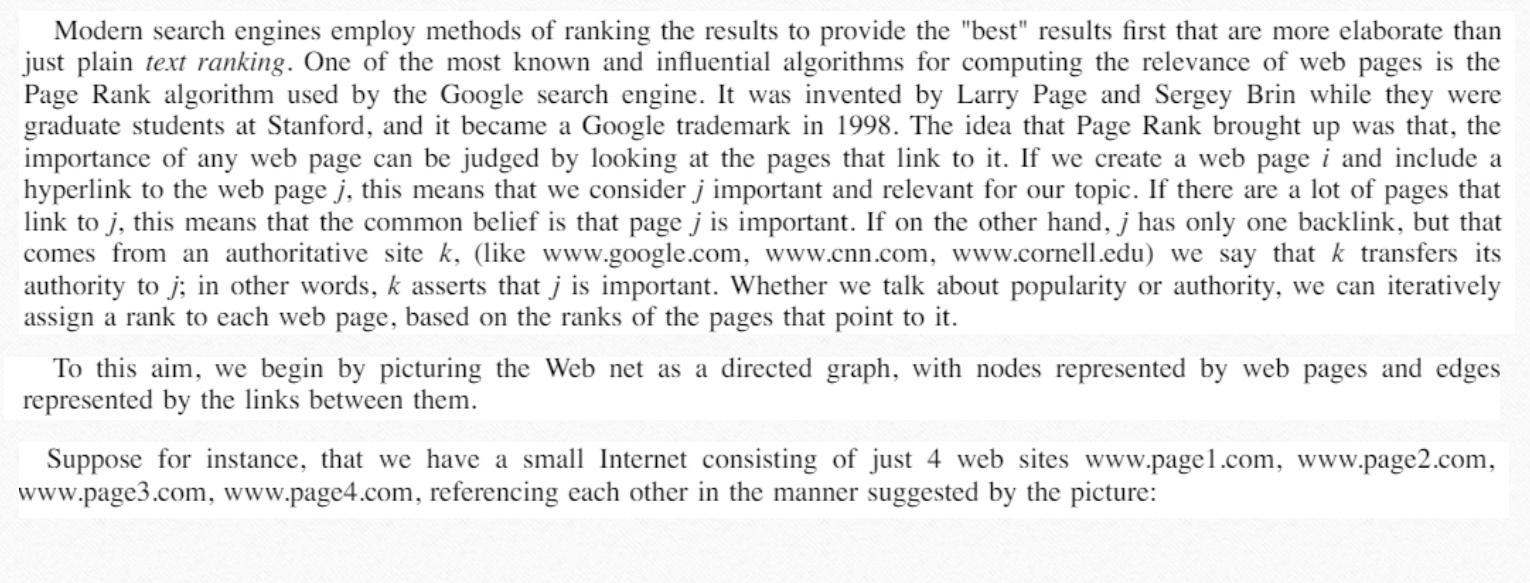

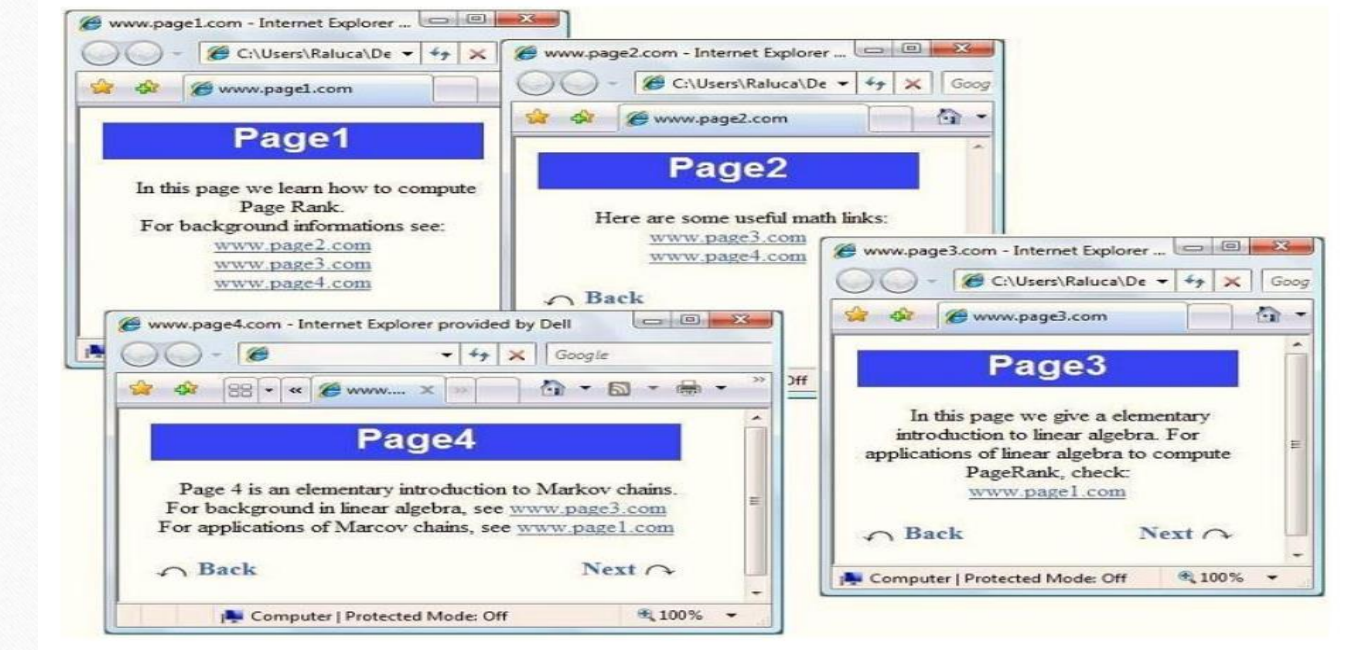

# Solution

**Step1:** Create a list of lists of pages connected to other pages

**Step2:** Generate equations and matrix which represents the page link

**Step3:** Find eigen values and eigen vectors of the matrix of linked pages

**Step4:** Find the page rank by scaling the eigen vector of eigen value closest to 1

**Step5:** Verify that sum of page rank is equal to 1

**Step6:** Find importance of each page and display it in descending order


import numpy as np
from numpy import linalg

#pages linked with each pages
pages=[[2,3,4], #page 1 linked with 2,3,4 pages
       [3,4],   #page 2 linked with 3,4 pages
       [1],     #page 3 linked with page 1
       [1,3]]   #page 4 linked with page 1,3

In [47]:
#define a function to generate algebric equations with the pages linked to other pages
def generate_equations(pages):
    num_pages=len(pages)
    equations=[]
    for i,links in enumerate(pages):
        equation=f"equation of page{i+1} is: "
        terms=[]
        for link in range(num_pages):
            if i+1 in pages[link]:
                terms.append(f"{1/len(pages[link])}*p{link+1}")
        equation += " + ".join(terms)
        equations.append(equation)
            
    return equations

equations=generate_equations(pages)
for equation in equations:
    print(equation)

#define a function to get matrix of linked pages
def generate_matrix(pages):
    num_pages = len(pages)
    A = np.zeros((num_pages, num_pages))
    
    for i, links in enumerate(pages):
        total_links = len(links)
        for link in links:
            A[link - 1, i] = 1 / total_links  
    return A
print("\nMatrix of linked pages is:\n")
matrix=generate_matrix(pages)
for row in matrix:
    print(row) 

equation of page1 is: 1.0*p3 + 0.5*p4
equation of page2 is: 0.3333333333333333*p1
equation of page3 is: 0.3333333333333333*p1 + 0.5*p2 + 0.5*p4
equation of page4 is: 0.3333333333333333*p1 + 0.5*p2

Matrix of linked pages is:

[0.  0.  1.  0.5]
[0.33333333 0.         0.         0.        ]
[0.33333333 0.5        0.         0.5       ]
[0.33333333 0.5        0.         0.        ]


In [55]:
#define a function to calculate eigen values and eigen vectors
def eigen_values_vectors(matrix):
    eigen_values,eigen_vectors=linalg.eig(matrix)
    print("Eigen Values:\n",eigen_values)
    print("Eigen Vectors:\n",eigen_vectors)

    #find index of eigen value closest to 1
    print("\neigen vector of eigen value closest to 1 is:")
    index=np.argmin(np.abs(eigen_values-1))
    vector=np.real(eigen_vectors[:,index])
    print(vector)
    return vector

#define a function to scale the eigen vector
def scaled_eigen_vector(eigen_vector):
    scaled=eigen_vector/sum(eigen_vector)
    print("\nscaled eigen vector is:")
    return scaled


In [56]:
#find eigen values and vectors of the matrix
page_rank=eigen_values_vectors(matrix)
scaled_page_rank=scaled_eigen_vector(page_rank)
print(scaled_page_rank)

#significance of each page
pages = ['Page1', 'Page2', 'Page3', 'Page4']
print("\nSignificance of each page:")
for page, importance in zip(pages, scaled_page_rank):
    print(page, " = ", importance)

#sum of page ranks is equal to 1
print("\nSum of page rank is:",sum(scaled_page_rank))


Eigen Values:
 [ 1.        +0.j         -0.36062333+0.41097555j -0.36062333-0.41097555j
 -0.27875333+0.j        ]
Eigen Vectors:
 [[ 0.72101012+0.j          0.75521571+0.j          0.75521571-0.j
   0.50648562+0.j        ]
 [ 0.24033671+0.j         -0.3036721 -0.34607247j -0.3036721 +0.34607247j
  -0.60565568+0.j        ]
 [ 0.54075759+0.j         -0.09315321+0.2746779j  -0.09315321-0.2746779j
  -0.38153917+0.j        ]
 [ 0.36050506+0.j         -0.3583904 +0.07139457j -0.3583904 -0.07139457j
   0.48070923+0.j        ]]

eigen vector of eigen value closest to 1 is:
[0.72101012 0.24033671 0.54075759 0.36050506]

scaled eigen vector is:
[0.38709677 0.12903226 0.29032258 0.19354839]

Significance of each page:
Page1  =  0.3870967741935484
Page2  =  0.12903225806451615
Page3  =  0.29032258064516114
Page4  =  0.19354838709677427

Sum of page rank is: 0.9999999999999999


In [57]:
#ranking the pages based on their significance
ranked_pages = [(i+1, rank) for i, rank in enumerate(page_rank)]
ranked_pages.sort(key=lambda x: x[1], reverse=True)

# Display the importance of pages in descending order
print("Page Rank:")
for page, rank in ranked_pages:
    print(f"Page {page}: {rank}")

Page Rank:
Page 1: 0.7210101217513317
Page 3: 0.5407575913134985
Page 4: 0.36050506087566603
Page 2: 0.24033670725044398
